# Clustering and Classification

Dataset:
House Price (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats

# 即时生成图片
%matplotlib inline

# 隠藏Wranning 
import warnings
warnings.filterwarnings("ignore")

# 1. 导入数据集


In [2]:
# import train.csv
dataset = pd.read_csv("data/train.csv")
print(f'Dataset size: {dataset.shape}')
print(f'{"Column Name":<16}Data Type')
dataset.info()

# Id is useless, so remove it
# Id 在数据集中只用来辨识数据行, 所以可以刪去
dataset = dataset.drop('Id',axis=1)
print(f'After Delete, Dataset size: {dataset.shape}')



Dataset size: (1460, 81)
Column Name     Data Type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  O

# 2. 数据预处理

引用前次的作业代码, 使用0, 中位数, 邻近值, 众数, 及栏位定义填补数据集的缺失部份, 并刪去异常值

In [3]:
### use 0 to fill NA in following Variable
dataset['MasVnrArea']=dataset['MasVnrArea'].fillna(0)

dataset['BsmtHalfBath']=dataset['BsmtHalfBath'].fillna(0)
dataset['BsmtFullBath']=dataset['BsmtFullBath'].fillna(0)
dataset['TotalBsmtSF']=dataset['TotalBsmtSF'].fillna(0)
dataset['BsmtUnfSF']=dataset['BsmtUnfSF'].fillna(0)
dataset['BsmtFinSF2']=dataset['BsmtFinSF2'].fillna(0)
dataset['BsmtFinSF1']=dataset['BsmtFinSF1'].fillna(0)

dataset['GarageArea']=dataset['GarageArea'].fillna(0)
dataset['GarageCars']=dataset['GarageCars'].fillna(0)
#dataset.info()

### Use median to fill NA in following Variable
dataset['GarageYrBlt']=dataset['GarageYrBlt'].fillna(dataset['GarageYrBlt'].median())
#dataset.info()

### Use neighbors to fill
# 按地区分组计算该地区的中位数, 并转化成字典方便之后获取数据
LotFrontageMedians = dataset.groupby('Neighborhood')['LotFrontage'].median().to_dict()
#print((LotFrontageMedians))
# 复制本身 LotFrontage Column 
newLotFrontage = dataset['LotFrontage']
for i in range(0,len(dataset)):
    # 寻找 NA
    if pd.isna(dataset['LotFrontage'][i]):
        #print(i)
        #print(dataset['Neighborhood'][i])
        #print(newLotFrontage[i])
        # 把 NA 改为该房屋所在地区的中位数
        newLotFrontage[i] = LotFrontageMedians[dataset['Neighborhood'][i]]
        #print(newLotFrontage[i])
        #break
#print(newLotFrontage)
# 把修改后的 Column 取代 dataset 原本的 Column
dataset['LotFrontage']=newLotFrontage
#print(dataset['LotFrontage'].info())

### Use mode to fill
dataset['Alley'] = dataset['Alley'].fillna("None")
dataset['PoolQC'] = dataset['PoolQC'].fillna("None")
dataset['Fence'] = dataset['Fence'].fillna("None")
dataset['MiscFeature'] = dataset['MiscFeature'].fillna("None")
dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna("None")
dataset['MasVnrType'] = dataset['MasVnrType'].fillna("None")

dataset['GarageType'] = dataset['GarageType'].fillna("None")
dataset['GarageFinish'] = dataset['GarageFinish'].fillna("None")
dataset['GarageQual'] = dataset['GarageQual'].fillna("None")
dataset['GarageCond'] = dataset['GarageCond'].fillna("None")

dataset['BsmtQual'] = dataset['BsmtQual'].fillna("None")
dataset['BsmtCond'] = dataset['BsmtCond'].fillna("None")
dataset['BsmtExposure'] = dataset['BsmtExposure'].fillna("None")
dataset['BsmtFinType1'] = dataset['BsmtFinType1'].fillna("None")
dataset['BsmtFinType2'] = dataset['BsmtFinType2'].fillna("None")

#print(dataset.info())

# fill according to definition
dataset['Electrical'] = dataset['Electrical'].fillna(dataset['Electrical'].mode()[0])
#print(dataset.info())

# remove outliers 
dataset = dataset.drop(dataset[(dataset['GrLivArea']>4500) & (dataset['SalePrice']<190000)].index)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1458 non-null   int64  
 1   MSZoning       1458 non-null   object 
 2   LotFrontage    1458 non-null   float64
 3   LotArea        1458 non-null   int64  
 4   Street         1458 non-null   object 
 5   Alley          1458 non-null   object 
 6   LotShape       1458 non-null   object 
 7   LandContour    1458 non-null   object 
 8   Utilities      1458 non-null   object 
 9   LotConfig      1458 non-null   object 
 10  LandSlope      1458 non-null   object 
 11  Neighborhood   1458 non-null   object 
 12  Condition1     1458 non-null   object 
 13  Condition2     1458 non-null   object 
 14  BldgType       1458 non-null   object 
 15  HouseStyle     1458 non-null   object 
 16  OverallQual    1458 non-null   int64  
 17  OverallCond    1458 non-null   int64  
 18  YearBuil

# 3. 聚类
再进行聚类之前, 我们先把 train 数据集分割, 切分为测试用和验证用, 用来评估性能效果


In [4]:
dataset.describe() 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,...,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,56.893004,69.992112,10459.936900,6.093964,5.576132,1971.218107,1984.834019,102.189986,438.827160,46.613169,...,94.084362,46.245542,21.984225,3.414266,15.081619,2.433471,43.548697,6.323045,2007.816187,180932.919067
std,42.329437,21.469099,9859.198156,1.376369,1.113359,30.193754,20.641760,179.109864,432.969094,161.420729,...,125.350021,65.312932,61.155666,29.337173,55.792877,38.209947,496.460799,2.700167,1.328826,79495.055285
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7544.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129925.000000
50%,50.000000,70.000000,9475.000000,6.000000,5.000000,1972.500000,1994.000000,0.000000,382.000000,0.000000,...,0.000000,24.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,163.750000,711.000000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 3.1 K-Means 实现


In [5]:
def selfKmeans(data, k, max_iterations=100):


    # 隨机初始化 K 个聚类中心
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for i in range(max_iterations):
        clusters = [[] for j in range(k)]
        labels = []

        # 将每个数据点分配给最近的质心
        for point in data:
            distances = np.linalg.norm(point  - centroids, axis=1)
            closest_centroid = np.argmin(distances)
            clusters[closest_centroid].append(point)
            labels.append(closest_centroid)
        
        # 更新质心
        new_centroids = np.array([np.mean(cluster, axis=0) for cluster in clusters])
        if np.allclose(centroids, new_centroids, rtol=1e-6):
            break

        centroids = new_centroids
    return centroids, clusters, labels


## 3.2 聚类可视化
以下部份对不同的标签与售价进行可视化, 以观察我们自己实现的 k-means 聚类成效

### 3.2.1 评价与售价
我们首先使用评价对房屋售价进行 k-means 聚类, 因为评价与售价大多呈正相关
并且在进行 k-means 聚类前对数据进行标准化

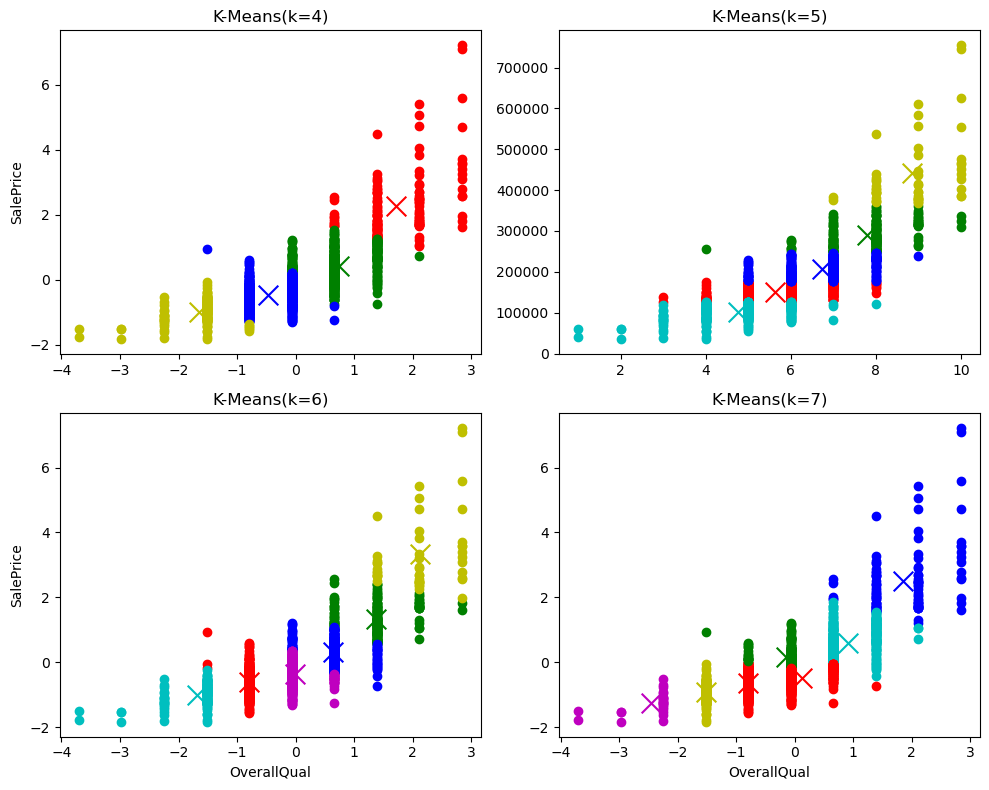

In [6]:
# 引入库进数据标准化
from sklearn import preprocessing


# 聚类数据
clusteringData = dataset[['OverallQual', 'SalePrice']].values
# 标准化数据
t = preprocessing.StandardScaler().fit(clusteringData)
stdClusteringData = t.transform(clusteringData)
# 聚类输出颜色
colors = ['r', 'g', 'b', 'y', 'c', 'm']

# 调用自己实现的 kemans 算法
centroids, clusters, labels = selfKmeans(stdClusteringData, k=4)
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i % len(colors)], marker='o')
    plt.scatter(centroids[i, 0], centroids[i, 1], c=colors[i % len(colors)], marker='x', s=200)
#plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('K-Means(k=4)')

newclusteringData = stdClusteringData

centroids, clusters, labels = selfKmeans(clusteringData, k=5)
plt.subplot(2, 2, 2)
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i % len(colors)], marker='o')
    plt.scatter(centroids[i, 0], centroids[i, 1], c=colors[i % len(colors)], marker='x', s=200)
#plt.xlabel('OverallQual')
#plt.ylabel('SalePrice')
plt.title('K-Means(k=5)')


centroids, clusters, labels = selfKmeans(stdClusteringData, k=6)
plt.subplot(2, 2, 3)
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i % len(colors)], marker='o')
    plt.scatter(centroids[i, 0], centroids[i, 1], c=colors[i % len(colors)], marker='x', s=200)
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('K-Means(k=6)')

centroids, clusters, labels = selfKmeans(stdClusteringData, k=7)
plt.subplot(2, 2, 4)
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i % len(colors)], marker='o')
    plt.scatter(centroids[i, 0], centroids[i, 1], c=colors[i % len(colors)], marker='x', s=200)
plt.xlabel('OverallQual')
#plt.ylabel('SalePrice')
plt.title('K-Means(k=7)')

# 自动调整子图的布局
plt.tight_layout()
plt.show()



图中展示了房屋评价与售价分別进行4-7个中心的 k-means 聚类时的情況, 不同的颜色表示不同的聚类, X为各个聚类的质心

### 3.2.2 地上面积与售价
我们使用房屋地上面积对房屋售价进行 k-means 聚类, 因为评价与售价大多呈正相关
并且在进行 k-means 聚类前对数据进行标准化

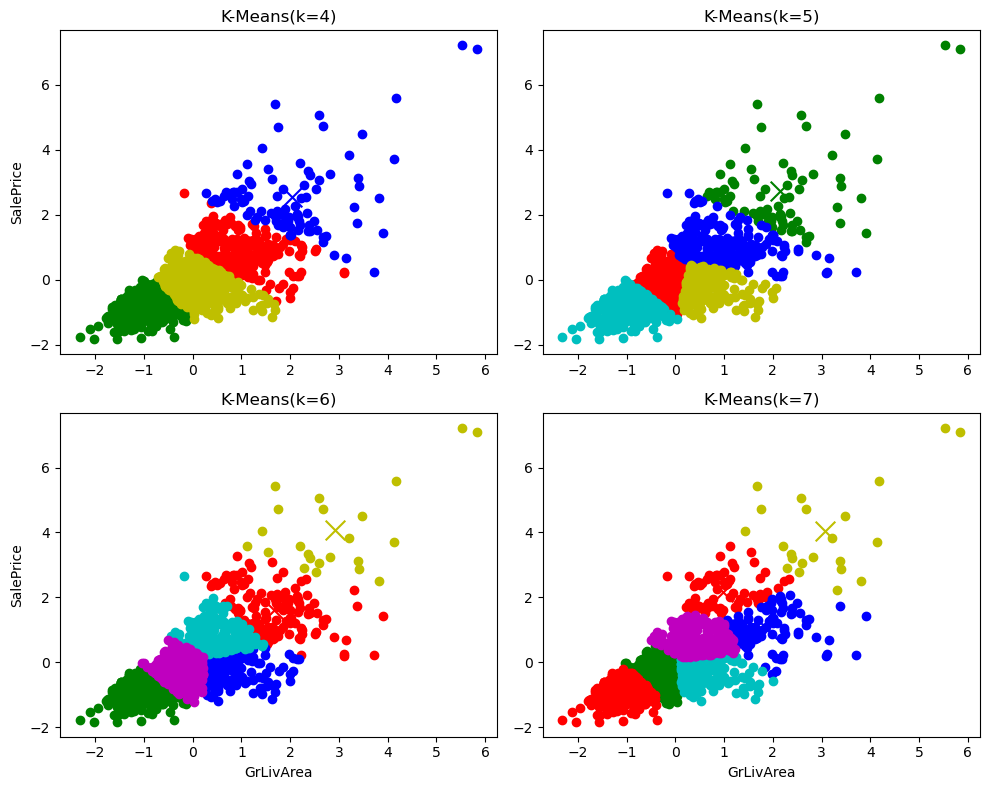

In [7]:


# 聚类数据
clusteringData2 = dataset[['GrLivArea', 'SalePrice']].values
# 标准化数据
t = preprocessing.StandardScaler().fit(clusteringData2)
stdClusteringData2 = t.transform(clusteringData2)
# 聚类输出颜色
colors = ['r', 'g', 'b', 'y', 'c', 'm']

# 调用自己实现的 kemans 算法
centroids, clusters, labels = selfKmeans(stdClusteringData2, k=4)
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i % len(colors)], marker='o')
    plt.scatter(centroids[i, 0], centroids[i, 1], c=colors[i % len(colors)], marker='x', s=200)
#plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('K-Means(k=4)')

centroids, clusters, labels = selfKmeans(stdClusteringData2, k=5)
plt.subplot(2, 2, 2)
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i % len(colors)], marker='o')
    plt.scatter(centroids[i, 0], centroids[i, 1], c=colors[i % len(colors)], marker='x', s=200)
#plt.xlabel('GrLivArea')
#plt.ylabel('SalePrice')
plt.title('K-Means(k=5)')


centroids, clusters, labels = selfKmeans(stdClusteringData2, k=6)
plt.subplot(2, 2, 3)
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i % len(colors)], marker='o')
    plt.scatter(centroids[i, 0], centroids[i, 1], c=colors[i % len(colors)], marker='x', s=200)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('K-Means(k=6)')

centroids, clusters, labels = selfKmeans(stdClusteringData2, k=7)
plt.subplot(2, 2, 4)
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i % len(colors)], marker='o')
    plt.scatter(centroids[i, 0], centroids[i, 1], c=colors[i % len(colors)], marker='x', s=200)
plt.xlabel('GrLivArea')
#plt.ylabel('SalePrice')
plt.title('K-Means(k=7)')

# 自动调整子图的布局
plt.tight_layout()
plt.show()

图中展示了房屋地上面积与售价分別进行4-7个中心的 k-means 聚类时的情況, 不同的颜色表示不同的聚类, X为各个聚类的质心

# 4. 分类


## 4.1 数据分割处理
把数据集中的特征和目标变量分开, 并把数据集分成训练和测试用, 用来评估模型

In [8]:
# 引入库来进行数据分割
from sklearn.model_selection import train_test_split

# 目标变量
labelDatas = dataset['SalePrice']

# 遍历寻找非数值特征变量並刪去
objectColumn = ['SalePrice']
for name, dtype in dataset.dtypes.iteritems():
    if dtype == object:
        objectColumn.append(name)
# 特征变量
featureDatas = dataset.drop(objectColumn,axis=1)

# 切割数据集
X_train, X_test, y_train, y_test = train_test_split(featureDatas, labelDatas, test_size=0.2, random_state=1)

#X_train.info()
#X_test.info()
#y_train.info()
#y_test.info()

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

## 4.2 決策树实现
我们采用了随机选择特征的方式和使用中位数去決策的方法来实现一个通用的決策树


In [9]:
# 导入所需的库
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import ttest_rel

# 决策树实现
class SelfDecisionTreeClassifier:
    # 初始化決策树
    def __init__(self, max_depth=None):
        # 最大树深度用于控制决策树的复杂度
        self.max_depth = max_depth

    # 构建決策树对外接口
    def fit(self, X, y):
        self.tree_ = self._build_tree(X, y, depth=0)
        return self

    # 生成树实现, 递归生成, 返回字典方便调用
    def _build_tree(self, X, y, depth):
        # 当目标变量只有一个类别或达到最大深度时，退出递归, 回传叶节点
        if len(np.unique(y)) == 1 or (self.max_depth is not None and depth >= self.max_depth):
            return {'label': np.argmax(np.bincount(y.astype(int)))}

        # 随机选择一个特征

        feature_idx = np.random.randint(X.shape[1])

        # 取得中位数作为分界值
        threshold = np.median(X[:, feature_idx])

        # 根据分界值将数据分为左子树和右子树
        mask = X[:, feature_idx] <= threshold
        left_tree = self._build_tree(X[mask], y[mask], depth + 1)
        right_tree = self._build_tree(X[np.logical_not(mask)], y[np.logical_not(mask)], depth + 1)

        # 返回当前节点的特征索引、分界值和左右子树
        return {'feature_idx': feature_idx, 'threshold': threshold, 'left': left_tree, 'right': right_tree}
    
    # 模型预测对外接口
    def predict(self, X):
        return np.array([self._predict_single(x) for x in X])

    # 模型预测实现
    def _predict_single(self, x):
        node = self.tree_

        # 根据特征和分界值进行决策，直到达到叶节点
        while 'label' not in node:
            if x[node['feature_idx']] <= node['threshold']:
                node = node['left']
            else:
                node = node['right']

        return node['label']


# 4.3 评估決策树


In [10]:
    
# 训练并评估自己实现的决策树
self_dataset = SelfDecisionTreeClassifier(max_depth=3)
self_dataset.fit(X_train, y_train)
self_dataset_preds = self_dataset.predict(X_test)
self_dataset_accuracy = accuracy_score(y_test, self_dataset_preds)

# 训练并评估scikit-learn决策树
sklearn_dataset = DecisionTreeClassifier(max_depth=3, random_state=42)
sklearn_dataset.fit(X_train, y_train)
sklearn_dataset_preds = sklearn_dataset.predict(X_test)
sklearn_dataset_accuracy = accuracy_score(y_test, sklearn_dataset_preds)

print(f"Self Decision Tree Accuracy: {self_dataset_accuracy:.4f}")
print(f"Scikit-learn Decision Tree Accuracy: {sklearn_dataset_accuracy:.4f}")

Self Decision Tree Accuracy: 0.0103
Scikit-learn Decision Tree Accuracy: 0.0000


由上述结果可以看出差异不大, 但由于这是纯数值类型的決策树, 而sklearn的決策树是可以支持非数值类型, 所以还是存在一定的缺陷